In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('Price_Data.csv')
df

,Average_Price_in_USD
0,0.083667
1,0.086667
2,0.088083
3,0.091583
4,0.092000
5,0.093583
6,0.094167
7,0.094333
8,0.086833
9,0.086333


In [3]:
#Mean and Standard Deviation after removing outliers
df.describe()

,Average_Price_in_USD
count,31.000000
mean,0.109992
std,0.020913
min,0.083667
25%,0.091792
50%,0.100000
75%,0.130958
max,0.138083


In [38]:
#Finding Variance
import statistics
statistics.variance([0.083666667,0.086666667,0.088083333,0.091583333,0.092,0.093583333,0.094166667,0.094333333,0.086833333,0.086333333,0.08725,0.092333333,0.091083333,0.092833333,0.094333333,0.1,0.112333333,0.116666667,0.123333333,0.127166667,0.127666667,0.12975,0.129583333,0.132166667,0.137083333,0.138083333,0.135166667,0.13775,0.13625,0.136333333,0.135333333])

0.0004373598880514935

In [39]:
#Percentile Calculations
L2 = df[['Average_Price_in_USD']]
np.percentile(L2 , 80, axis = 0)

array([0.13516667])

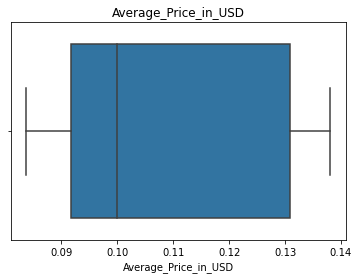

Number Of Data without Outliers:31

(array([], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64),)

Number Of Data with Outliers:0



In [40]:
sns.boxplot(x=df.Average_Price_in_USD)
plt.title('Average_Price_in_USD')
plt.show();
#The boxplot shows Quartile1, Quartile 2(median),Quartile 3 and Quartile 4 .It also shows No outliers
print(f"Number Of Data without Outliers:{len(df['Average_Price_in_USD'])}\n")

#Finding Outliers:
Q1 = df['Average_Price_in_USD'].quantile(.25)
Q2 = df['Average_Price_in_USD'].quantile(.50)
Q3 = df['Average_Price_in_USD'].quantile(.75)
IQR = Q3 - Q1

upper = np.where(df['Average_Price_in_USD']>=(Q3 + 1.5 * IQR))
lower = np.where(df['Average_Price_in_USD']<=(Q1 + 1.5 * IQR))

print(upper)
print(lower)

#Removing Outliers Form the Data
df.drop(upper[0],inplace = True)
df.drop(lower[0], inplace = True)

print(f"\nNumber Of Data with Outliers:{len(df['Average_Price_in_USD'])}\n")

#Skewness is Positive since the Median < Mean and it Median is inclined towards the left

In [41]:
new_df = pd.read_csv('Data.csv')

<AxesSubplot:>

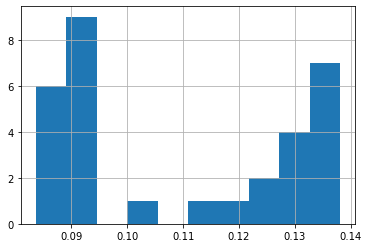

In [42]:
new_df['Average_Price_in_USD'].hist()
#In the Histogram the X-Axis holds the Average Price values and the Y-Axis holds the Frequency Count

In [43]:
from scipy import stats
L2 = new_df[['Average_Price_in_USD']]
stats.skew(L2)

array([0.17094918])

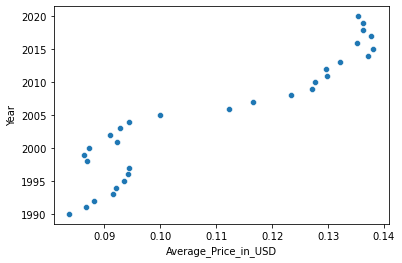

In [44]:
sns.scatterplot(x="Average_Price_in_USD",y="Year",data=new_df)
plt.show()
#Scatter plot is a Right linear relation between the Average Price and Year Variables and the strength of this Relation is Strong
#Skewness - 0.17094918

In [46]:
#Coefficient of variance
data = [0.083666667,0.086666667,0.088083333,0.091583333,0.092,0.093583333,0.094166667,0.094333333,0.086833333,0.086333333,0.08725,0.092333333,0.091083333,0.092833333,0.094333333,0.1,0.112333333,0.116666667,0.123333333,0.127166667,0.127666667,0.12975,0.129583333,0.132166667,0.137083333,0.138083333,0.135166667,0.13775,0.13625,0.136333333,0.135333333]
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

cv(data)

19.013349483634446

In [50]:
# Calculate pearson coefficient and p-value
pearson_coef, p_value = stats.pearsonr(new_df['Average_Price_in_USD'], new_df['Year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#Since we have the 'r' value closer to +1, there is a stronger positive relationship between Average_Price_in_USD and Year

The Pearson Correlation Coefficient is 0.9331187694727395  with a P-value of P = 2.054299951877168e-14
